In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('Global_Pollution_Analysis.csv')
df.isnull().sum()
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [3]:
scaler_num = StandardScaler()
df[['CO2_Emissions (in MT)', 'Industrial_Waste (in tons)']] = scaler_num.fit_transform(
    df[['CO2_Emissions (in MT)', 'Industrial_Waste (in tons)']])
le_country = LabelEncoder()
le_year = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Year'] = le_year.fit_transform(df['Year'])

In [4]:
df['Total_Pollution_Index'] = df['Air_Pollution_Index'] + df['Water_Pollution_Index'] + df['Soil_Pollution_Index']
def categorize_pollution(v):
    if v < 400:
        return 'Low'
    if v < 600:
        return 'Medium'
    return 'High'
df['Pollution_Severity'] = df['Total_Pollution_Index'].apply(categorize_pollution)
le=LabelEncoder()
df['Pollution_Severity']=le.fit_transform(df['Pollution_Severity'])

In [5]:
scaler_poll = StandardScaler()
df[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']] = scaler_poll.fit_transform(
    df[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']])
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Total_Pollution_Index,Pollution_Severity
0,77,5,1.376167,0.193880,-0.619764,1.543328,158.14,-1.356325,41.11,37078.88,12.56,42.22,20972.96,448.92,1
1,147,1,-1.403578,-1.153098,1.028744,0.124915,498.04,-1.284276,36.44,33128.20,5.23,137.25,34850.41,264.28,0
2,136,16,-1.330788,-0.668076,1.142400,0.123888,489.51,1.718910,9.38,18803.46,13.15,124.47,57773.15,296.67,0
3,38,18,1.494394,-1.009403,0.431675,0.809131,145.18,-1.106232,18.97,9182.27,0.78,67.80,21837.51,441.35,1
4,46,8,-0.021926,0.262567,1.138106,0.882681,40.38,-0.689181,34.00,39235.12,12.84,186.52,41379.37,428.24,1


In [6]:
X = df[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index',
        'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)',
        'Energy_Consumption_Per_Capita (in MWh)']]
y=df["Pollution_Severity"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred))
print("Classification Report\n",
      classification_report(y_test, y_pred))

Accuracy : 0.775
Confusion Matrix
 [[28  1]
 [ 8  3]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.97      0.86        29
           1       0.75      0.27      0.40        11

    accuracy                           0.78        40
   macro avg       0.76      0.62      0.63        40
weighted avg       0.77      0.78      0.73        40



In [7]:
X = df[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index',
        'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)',
        'Energy_Consumption_Per_Capita (in MWh)']]
y = df['Pollution_Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
param_grid_knn = {'n_neighbors': list(range(3, 21, 2))}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
knn_best = grid_knn.best_estimator_
y_pred_knn = knn_best.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
rep_knn = classification_report(y_test, y_pred_knn)
print('KNN Best k:', grid_knn.best_params_['n_neighbors'])
print('KNN Accuracy:', acc_knn)
print('KNN Confusion Matrix:\n', cm_knn)
print('KNN Classification Report:\n', rep_knn)

KNN Best k: 5
KNN Accuracy: 0.8
KNN Confusion Matrix:
 [[21  3]
 [ 5 11]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84        24
           1       0.79      0.69      0.73        16

    accuracy                           0.80        40
   macro avg       0.80      0.78      0.79        40
weighted avg       0.80      0.80      0.80        40



In [8]:
param_grid_dt = {'max_depth': [3, 5, 7, None], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)
dt_best = grid_dt.best_estimator_
y_pred_dt = dt_best.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
rep_dt = classification_report(y_test, y_pred_dt)
print('Decision Tree Params:', grid_dt.best_params_)
print('Decision Tree Accuracy:', acc_dt)
print('Decision Tree Confusion Matrix:\n', cm_dt)
print('Decision Tree Classification Report:\n', rep_dt)

Decision Tree Params: {'max_depth': 5, 'min_samples_split': 10}
Decision Tree Accuracy: 0.85
Decision Tree Confusion Matrix:
 [[20  4]
 [ 2 14]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        24
           1       0.78      0.88      0.82        16

    accuracy                           0.85        40
   macro avg       0.84      0.85      0.85        40
weighted avg       0.86      0.85      0.85        40



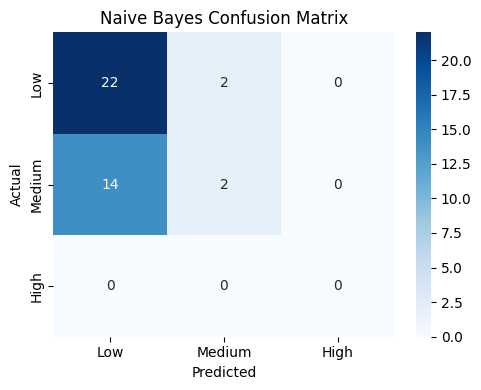

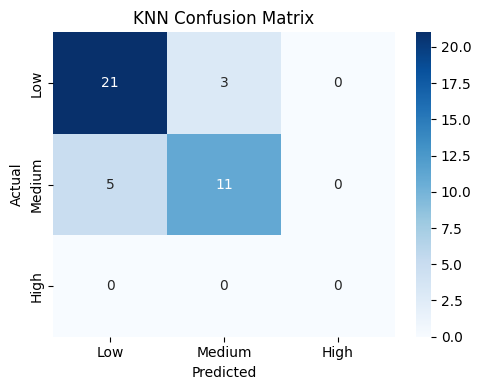

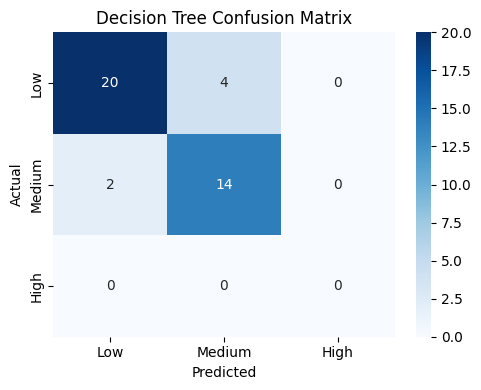

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm_nb = confusion_matrix(y_test, y_pred, labels=[0,1,2])
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=[0,1,2])
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=[0,1,2])


def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Low", "Medium", "High"],
                yticklabels=["Low", "Medium", "High"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.tight_layout()
    plt.show()


plot_confusion_matrix(cm_nb, "Naive Bayes Confusion Matrix")
plot_confusion_matrix(cm_knn, "KNN Confusion Matrix")
plot_confusion_matrix(cm_dt, "Decision Tree Confusion Matrix")
